In [190]:
# Main imports established
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Descriptive and target features established
desc_features=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
target='stroke'

# Preprocessed data read from a csv file and displayed in a DataFrame
df=pd.read_csv('preprocessed.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.04,0.0,0.0,No,children,Rural,Normal,Underweight,never smoked,0.0
1,Male,0.71,1.0,0.0,Yes,Private,Urban,Normal,Obesity,never smoked,0.0
2,Female,0.10,0.0,0.0,No,Private,Urban,Prediabetes,Underweight,never smoked,0.0
3,Female,0.85,0.0,0.0,Yes,Private,Rural,Normal,Obesity,formerly smoked,0.0
4,Male,0.17,0.0,0.0,No,Never_worked,Rural,Diabetes,Healthy,never smoked,0.0
...,...,...,...,...,...,...,...,...,...,...,...
43384,Female,0.12,0.0,0.0,No,children,Urban,Normal,Healthy,never smoked,0.0
43385,Female,0.68,0.0,0.0,Yes,Govt_job,Urban,Diabetes,Obesity,formerly smoked,0.0
43386,Female,1.00,1.0,0.0,Yes,Private,Urban,Normal,Overweight,formerly smoked,0.0
43387,Male,0.49,0.0,0.0,Yes,Private,Urban,Normal,Obesity,never smoked,0.0


In [191]:
# Over Sampling
from imblearn.over_sampling import RandomOverSampler
OverSampled=RandomOverSampler(random_state=0)
X_resampled, Y_resampled=OverSampled.fit_resample(df[desc_features], df[target])

df=X_resampled
df.insert(10,'stroke',Y_resampled)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.04,0.0,0.0,No,children,Rural,Normal,Underweight,never smoked,0.0
1,Male,0.71,1.0,0.0,Yes,Private,Urban,Normal,Obesity,never smoked,0.0
2,Female,0.10,0.0,0.0,No,Private,Urban,Prediabetes,Underweight,never smoked,0.0
3,Female,0.85,0.0,0.0,Yes,Private,Rural,Normal,Obesity,formerly smoked,0.0
4,Male,0.17,0.0,0.0,No,Never_worked,Rural,Diabetes,Healthy,never smoked,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85207,Male,0.56,0.0,0.0,Yes,Private,Urban,Normal,Healthy,formerly smoked,1.0
85208,Female,0.90,0.0,0.0,Yes,Private,Rural,Diabetes,Obesity,never smoked,1.0
85209,Female,0.96,1.0,0.0,Yes,Private,Rural,Diabetes,Overweight,never smoked,1.0
85210,Male,0.95,1.0,1.0,No,Self-employed,Rural,Prediabetes,Overweight,never smoked,1.0


In [192]:
# Checking that there are the same amount of instances for each class in the target feature
df[target].value_counts()

stroke
0.0    42606
1.0    42606
Name: count, dtype: int64

In [193]:
# Checking to make sure there are no missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [194]:
# Splitting the data into training and testing (33% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df[desc_features],df[target],test_size=.33,random_state=0)

In [195]:
# Checking that the train test split executed properly
print("Y_train class count:\n", Y_train.value_counts(), "\n\nY_test class count:\n", Y_test.value_counts())

Y_train class count:
 stroke
0.0    28699
1.0    28393
Name: count, dtype: int64 

Y_test class count:
 stroke
1.0    14213
0.0    13907
Name: count, dtype: int64


In [196]:
# Target training set
pd.DataFrame(Y_train)

,stroke
79819,1.0
67484,1.0
59371,1.0
34243,0.0
26828,0.0
...,...
21243,0.0
45891,1.0
42613,0.0
43567,1.0


In [197]:
# Target testing set
pd.DataFrame(Y_test)

,stroke
79914,1.0
45127,1.0
808,0.0
72713,1.0
14739,0.0
...,...
32709,0.0
41778,0.0
19245,0.0
7757,0.0


In [198]:
# Categorical features made into continuous in the training and testing sets through encoding
from sklearn.preprocessing import OrdinalEncoder

cat_features=['gender', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

enc=OrdinalEncoder()

enc.fit(X_train[cat_features])
X_train[cat_features]=enc.transform(X_train[cat_features])

enc.fit(X_test[cat_features])
X_test[cat_features]=enc.transform(X_test[cat_features])

In [199]:
# Normalization of training and testing sets
from sklearn.preprocessing import MinMaxScaler

NormalizedDF=MinMaxScaler().fit(X_train)
X_train=NormalizedDF.transform(X_train)
X_train=X_train.round(2)

NormalizedDF=MinMaxScaler().fit(X_test)
X_test=NormalizedDF.transform(X_test)
X_test=X_test.round(2)

In [200]:
# Checking to make sure there are no missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [201]:
# Descriptive Features training set after encoding and normalizing
pd.DataFrame(X_train, columns=desc_features)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,0.96,1.0,0.0,1.0,0.75,1.0,0.5,0.33,0.0
1,0.0,0.96,0.0,1.0,1.0,0.50,0.0,0.0,0.67,0.5
2,0.0,0.40,0.0,0.0,1.0,0.75,0.0,0.0,0.00,0.0
3,0.0,0.48,0.0,0.0,1.0,0.50,1.0,0.5,0.67,0.5
4,1.0,0.43,0.0,0.0,1.0,0.50,0.0,0.0,0.67,0.0
...,...,...,...,...,...,...,...,...,...,...
57087,0.0,0.21,0.0,0.0,0.0,0.00,1.0,1.0,0.67,0.5
57088,1.0,0.76,0.0,1.0,1.0,0.50,0.0,1.0,0.67,0.0
57089,0.0,0.21,0.0,0.0,0.0,0.50,1.0,0.0,0.00,0.5
57090,1.0,0.96,0.0,1.0,1.0,0.50,0.0,0.0,0.00,0.0


In [202]:
# Descriptive Features testing set after encoding and normalizing
pd.DataFrame(X_test, columns=desc_features)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,0.80,0.0,0.0,1.0,0.0,0.0,0.0,0.33,0.0
1,1.0,0.74,0.0,1.0,1.0,0.5,1.0,0.0,0.33,0.5
2,0.0,0.29,0.0,0.0,1.0,0.5,0.0,0.5,0.00,0.5
3,0.0,0.63,0.0,0.0,1.0,0.5,1.0,0.5,0.00,0.5
4,0.0,0.34,0.0,0.0,1.0,0.0,0.0,0.0,0.67,0.0
...,...,...,...,...,...,...,...,...,...,...
28115,1.0,0.05,0.0,0.0,0.0,1.0,1.0,0.5,1.00,0.5
28116,1.0,0.88,1.0,0.0,1.0,0.5,0.0,0.5,0.67,0.0
28117,0.0,0.88,0.0,0.0,1.0,0.5,0.0,0.5,0.00,0.0
28118,1.0,1.00,1.0,1.0,0.0,0.5,0.0,0.0,0.00,0.5


Log Reg Accuracy: 0.78
f1 score: 0.79
ROC Index: 0.78

Confusion Matrix:
        0      1
0  10306   3601
1   2643  11570

Confusion Matrix Display:


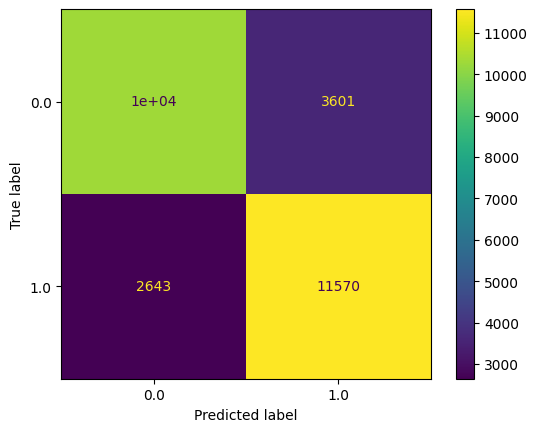

In [203]:
# Error Based Learning: Logistic Regression

# Imports for the metrics used, logistic regression, and ordinal encoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Logistic Regression applied to the training set
Logreg=LogisticRegression()
Logreg.fit(X_train,Y_train)

# target prediction made
y_pred_Logreg=Logreg.predict(X_test)

# Metrics displayed
print("Log Reg Accuracy: {0:.2f}".format(accuracy_score(Y_test,y_pred_Logreg)))
print("f1 score: {0:.2f}".format(f1_score(Y_test, y_pred_Logreg)))
print("ROC Index: {0:.2f}\n".format(roc_auc_score(Y_test, y_pred_Logreg)))

# Confusion Matrix
cm=confusion_matrix(Y_test, y_pred_Logreg)
cm_df=pd.DataFrame(cm)
print("Confusion Matrix:\n", cm_df)

# Confusion Matrix Display
print("\nConfusion Matrix Display:")
CM_DF_Disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(Logreg.classes_))
CM_DF_Disp.plot()
plt.show()

In [204]:
# Weights of each feature for a line of best fit with a multivariable function
coef=pd.DataFrame(Logreg.coef_, columns=desc_features).round(2)
coef

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.14,6.13,0.4,0.74,-0.02,0.18,0.12,-0.58,0.0,0.16


NB Accuracy: 0.76
f1 score: 0.77
ROC Index: 0.76

Confusion Matrix:
        0      1
0  10097   3810
1   2886  11327

Confusion Matrix Display:


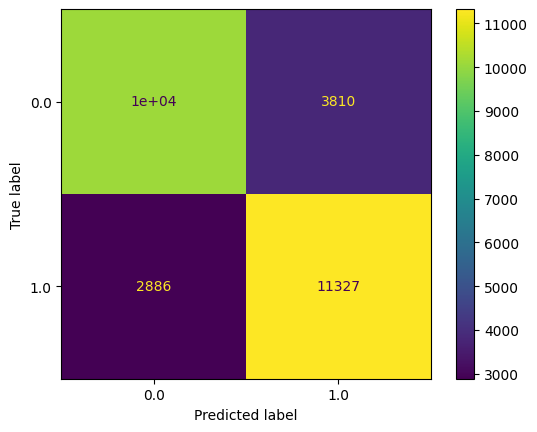

In [205]:
# Probability Based Learning: Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model applied to the training set
_nbc=GaussianNB(priors=None)
_nbc.fit(X_train,Y_train)

# Target prediction made
y_pred_nbc=_nbc.predict(X_test)

# Metrics applied
print("NB Accuracy: {0:.2f}".format(accuracy_score(Y_test,y_pred_nbc)))
print("f1 score: {0:.2f}".format(f1_score(Y_test, y_pred_nbc)))
print("ROC Index: {0:.2f}\n".format(roc_auc_score(Y_test, y_pred_nbc)))

# Confusion Matrix
cm=confusion_matrix(Y_test,y_pred_nbc, labels=_nbc.classes_)
cm_df=pd.DataFrame(cm)
print("Confusion Matrix:\n", cm_df)

# Confusion Matrix Display
print("\nConfusion Matrix Display:")
CM_DF_Disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=_nbc.classes_)
CM_DF_Disp.plot()
plt.show()

In [206]:
# Priors displayed which is the probability of each class in the target feature
cp=pd.DataFrame(_nbc.class_prior_).style.format(precision=2)
cp

,0
0,0.50
1,0.50


/Users/davidespinosa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AB Accuracy: 0.78
f1 score: 0.79
ROC Index: 0.78

Confusion Matrix:
        0      1
0  10456   3451
1   2741  11472

Confusion Matrix Display:


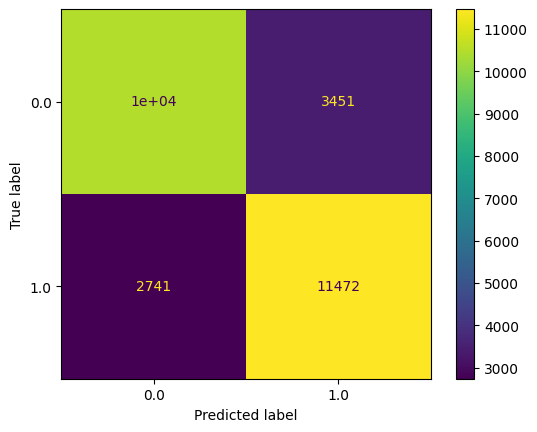

In [207]:
# Information Based Learning: Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting Ensemble established using DecisionTreeClassifier as the base estimator
Abc=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=4)
Abc.fit(X_train, Y_train)

# Target is predicted
y_pred_Abc=Abc.predict(X_test)

# Metrics displayed
print("AB Accuracy: {0:.2f}".format(accuracy_score(Y_test, y_pred_Abc)))
print("f1 score: {0:.2f}".format(f1_score(Y_test, y_pred_Abc)))
print("ROC Index: {0:.2f}\n".format(roc_auc_score(Y_test, y_pred_Abc)))

# Confusion Matrix
cm=confusion_matrix(Y_test, y_pred_Abc)
cm_df=pd.DataFrame(cm)
print("Confusion Matrix:\n", cm_df)

# Confusion Matrix Display
print("\nConfusion Matrix Display:")
CM_DF_Disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Abc.classes_)
CM_DF_Disp.plot()
plt.show()

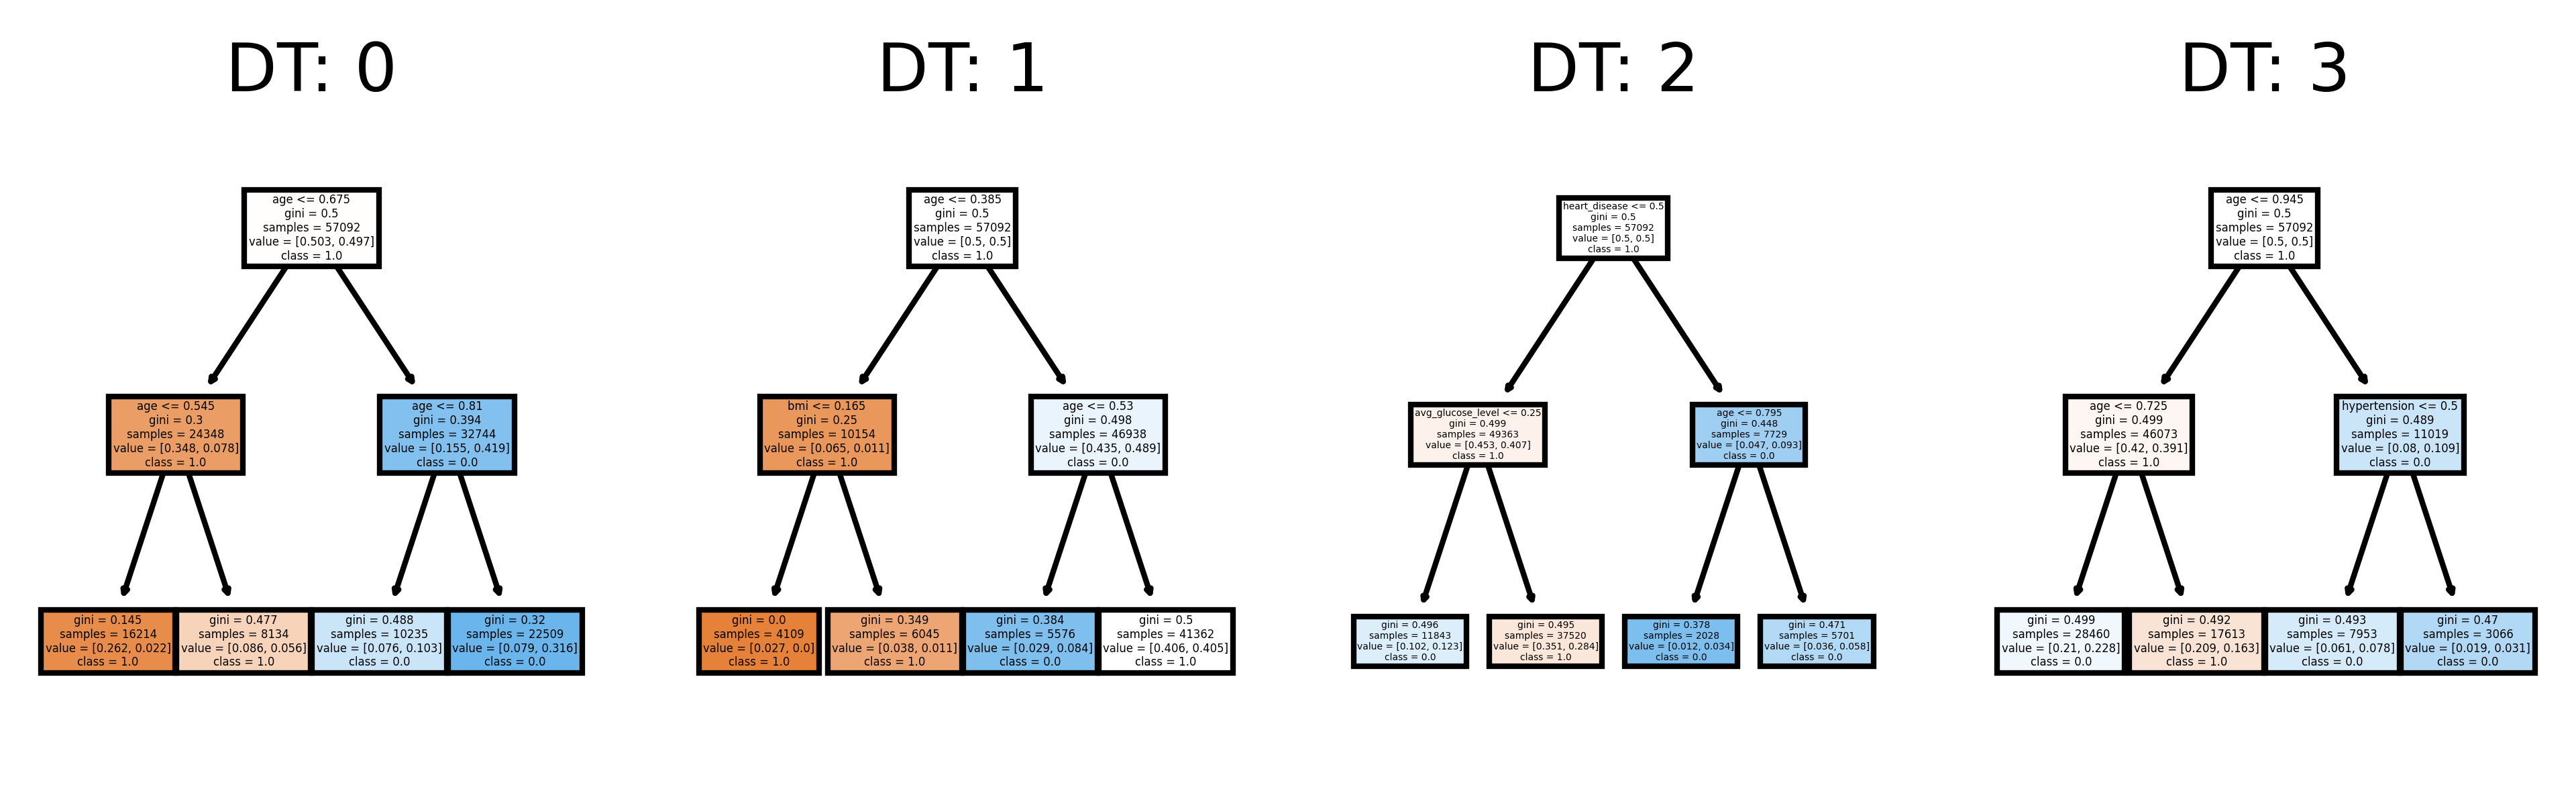

In [208]:
# Set of trees made from a few subsamples of the data and by averaging, the accuracy is improved and over-fitting is prevented
from sklearn import tree

fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(8,2), dpi=600)
for i in range(4):
    tree.plot_tree(Abc.estimators_[i], feature_names=desc_features, class_names=Y_train.unique().astype(str), filled=True, ax=axes[i])
    axes[i].set_title('DT: '+str(i))

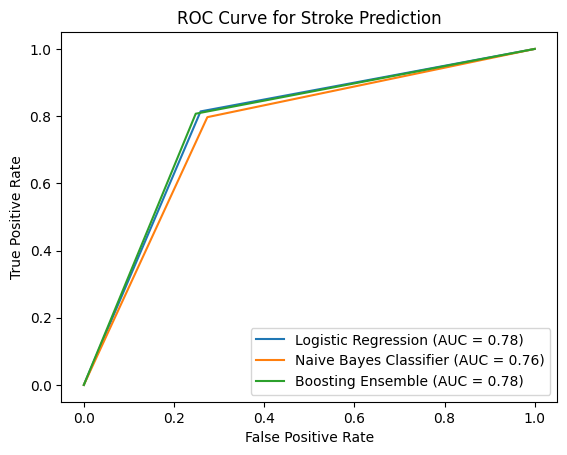

In [209]:
# ROC Curves made for the 3 Machine Learning models used
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# ROC curves established
fpr_Logreg, tpr_Logreg, threshold1_Logreg = roc_curve(Y_test, y_pred_Logreg)
roc_auc_Logreg = auc(fpr_Logreg, tpr_Logreg)

fpr_nbc, tpr_nbc, threshold1_nbc = roc_curve(Y_test, y_pred_nbc)
roc_auc_nbc = auc(fpr_nbc, tpr_nbc)

fpr_Abc, tpr_Abc, threshold1_Abc = roc_curve(Y_test, y_pred_Abc)
roc_auc_Abc = auc(fpr_Abc, tpr_Abc)

# ROC Curves plotted
plt.figure()
plt.plot(fpr_Logreg, tpr_Logreg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_Logreg)
plt.plot(fpr_nbc, tpr_nbc, label='Naive Bayes Classifier (AUC = %0.2f)' % roc_auc_nbc)
plt.plot(fpr_Abc, tpr_Abc, label='Boosting Ensemble (AUC = %0.2f)' % roc_auc_Abc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stroke Prediction')
plt.legend()
plt.show()